In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
63968,Fattyjwoods,Martijn Hoekstra,0,1.0,2008.0,2008-03-26 03:59:00,"'''Neutral''' I hate being the odd one out, bu...",1,26.750000,31
156686,Joturner,Cookiecaper,-1,-1.0,2006.0,2006-04-19 22:44:00,'''Oppose''' Not very active since February 20...,2,35.916667,42
34412,Ceranthor,Ched Davis,1,1.0,2009.0,2009-06-12 10:34:00,Good work. ''',2,6.683333,24
40358,A Nobody,Orlady,1,1.0,2009.0,2009-04-10 19:56:00,'''Support''' as in the six AFDs we both parti...,1,52.250000,74
133745,Terenceong1992,EurekaLott,1,1.0,2006.0,2006-01-15 12:05:00,'''Support''' --[[User:Terenceong1992|Ter]][[W...,1,8.716667,6


In [3]:
# Add vote number in round of election to df_vote_evolution
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
21250,Scott MacDonald,Everyking,-1,1.0,2010.0,2010-01-23 21:05:00,On the ballance of probabilities would be a mi...,6,119.666667,212
13898,NSD,Rami R,1,1.0,2011.0,2011-02-11 20:45:00,'''Support'''. I trust this candidate. ~<span ...,2,104.916667,63
28967,WereSpielChequers,Herostratus,1,-1.0,2010.0,2010-06-24 19:15:00,'''Weak Support''' I regard the BLP/AFD and th...,2,27.733333,62
114760,Englishrose,Elonka,1,-1.0,2007.0,2007-07-27 17:29:00,"'''Support''' Good active friendly admin, will...",3,1.816667,17
160912,DaGizza,Jaranda,0,-1.0,2006.0,2006-03-21 08:01:00,"'''Neutral''' Has done great work, but so many...",1,29.566667,44


# Evolution of votes proportions through time

In [4]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
88632,Shirahadasha,C.Fred,1,1.0,2007.0,2007-05-13 03:35:00,"'''Support'''. Edits seem reasonable, sufficie...",1,0 days 01:16:00.000000001,3,1.000000
50268,J Milburn,Neurolysis,1,-1.0,2009.0,2009-04-06 22:27:00,"'''Strong support''', will make the kind of ad...",1,0 days 02:27:00,27,0.925926
88681,Anas Salloum,Caknuck,1,1.0,2007.0,2007-07-24 22:18:00,'''Support''' —,1,0 days 23:55:59.999999998,20,1.000000
59617,Strikeout Sister,GrahamColm,1,1.0,2008.0,2008-12-29 03:14:00,"'''Must. Pile. On.''' - Support, seriously. Fi...",1,6 days 08:43:59.999999998,134,0.895522
99414,Sr13,MastCell,1,1.0,2007.0,2007-05-05 07:57:00,'''Support''' Looks clean. ''',1,0 days 07:55:00.000000001,16,1.000000


#### Tendencies, center and dispersion

In [5]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the median, first and last quartile
quartiles = get_quartiles(rolling_avg)
quartiles.Voting_time = time_to_float(quartiles.Voting_time)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(rolling_avg)
sem.Voting_time = time_to_float(sem.Voting_time)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
89,-1.0,89.0,0.063830,0.325000,0.526627
245,1.0,25.0,0.846154,0.948718,1.000000
533,1.0,331.0,0.234483,0.234483,0.234483
178,-1.0,178.0,0.282958,0.355737,0.452335
65,-1.0,65.0,0.061670,0.310345,0.503846


,Results,Voting_time,center,sem,lower,upper
466,1.0,252.0,0.498017,0.067201,0.366303,0.629731
48,-1.0,48.0,0.255220,0.018962,0.218055,0.292384
623,1.0,606.0,0.880952,NaN,NaN,NaN
404,1.0,184.0,0.803948,0.051620,0.702774,0.905123
506,1.0,293.0,0.606557,NaN,NaN,NaN


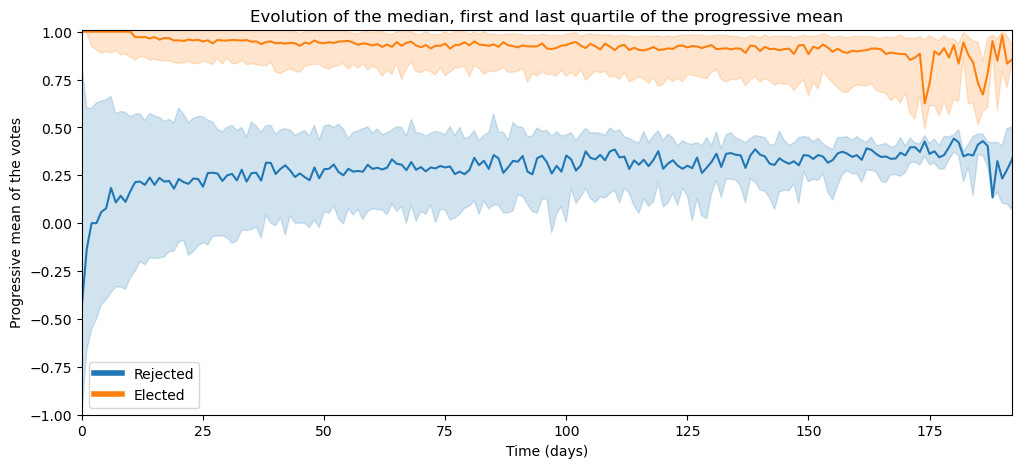

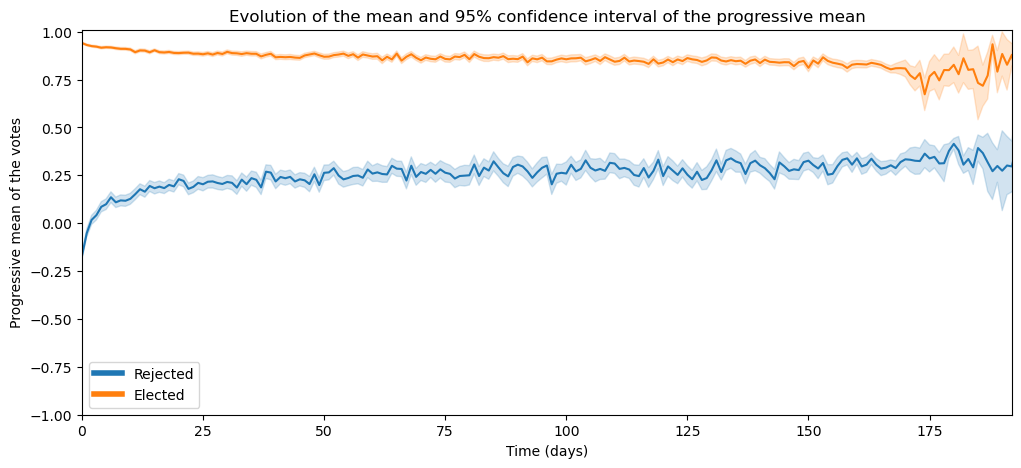

In [6]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Voting_time')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Voting_time')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()


In [7]:
df_vote_evolution

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0 days 00:00:00,1,1.000000
115406,BigDT,Ferrett3,-1,-1.0,2007.0,2007-02-19 03:19:00,'''Suggest withdrawal''' - most admins have th...,1,0 days 00:00:00,1,-1.000000
48617,Youngamerican,Jerem43,1,-1.0,2009.0,2009-07-17 11:23:00,'''Support''' as nom.,1,0 days 00:00:00,1,1.000000
115391,U.S.A.U.S.A.U.S.A.,FastLizard4,1,-1.0,2007.0,2007-11-10 05:35:00,--,1,0 days 00:00:00,1,1.000000
115324,Stangbat,Fan-1967,1,-1.0,2007.0,2007-01-26 02:50:00,'''Support''' per nom. I first encountered Fan...,1,0 days 00:00:00,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
105809,StuffOfInterest,SchuminWeb,1,1.0,2007.0,2007-06-11 16:32:00,'''Support'''. Would prefer to see a little l...,2,33 days 00:09:00,45,0.733333
105810,Blnguyen,SchuminWeb,1,1.0,2007.0,2007-06-12 00:26:00,'''Support''' - good contributor. ''',2,33 days 08:03:00,46,0.739130
105811,Captain panda,SchuminWeb,1,1.0,2007.0,2007-06-12 01:17:00,'''Support''' A good one to have the tools.,2,33 days 08:54:00,47,0.744681
105812,Vision Thing,SchuminWeb,1,1.0,2007.0,2007-06-12 19:23:00,'''Support''' I had some doubts on his last Rf...,2,34 days 03:00:00,48,0.750000


In [8]:
# Election evolution by vote number
vote_nb = df_vote_evolution.groupby(['Results', 'Vote_number']).progressive_mean
# Compute the median, first and last quartile
quartiles = get_quartiles(vote_nb)

# Compute the mean and 95% confidence interval
sem = get_confidence_interval(vote_nb)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Vote_number,lower,center,upper
401,1.0,125,0.698000,0.880000,0.976000
72,-1.0,73,0.150685,0.342466,0.479452
375,1.0,99,0.737374,0.909091,0.979798
417,1.0,141,0.673759,0.815603,0.964539
468,1.0,192,0.541667,0.742188,0.938802


,Results,Vote_number,center,sem,lower,upper
527,1.0,251,0.783533,0.131943,0.524925,1.042140
198,-1.0,199,0.336683,0.073428,0.192765,0.480602
345,1.0,69,0.869785,0.005756,0.858503,0.881068
516,1.0,240,0.711458,0.119768,0.476714,0.946203
114,-1.0,115,0.314623,0.026479,0.262724,0.366523


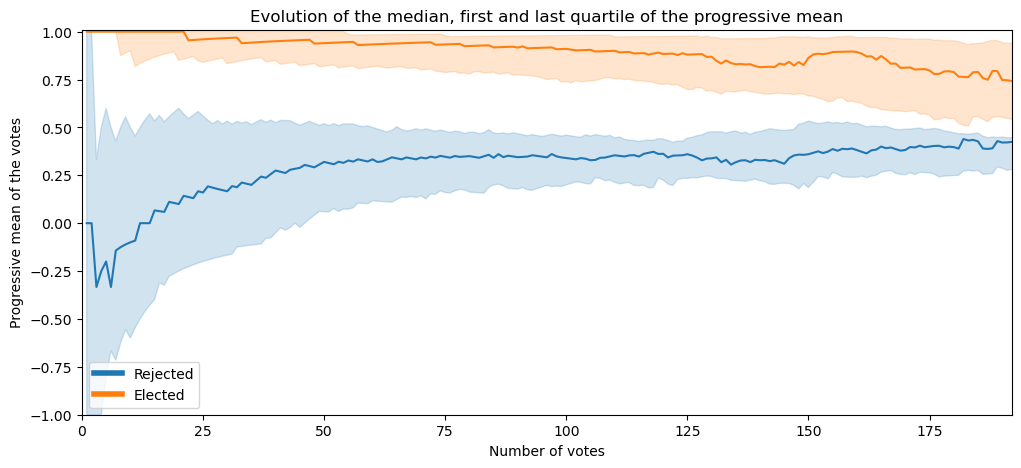

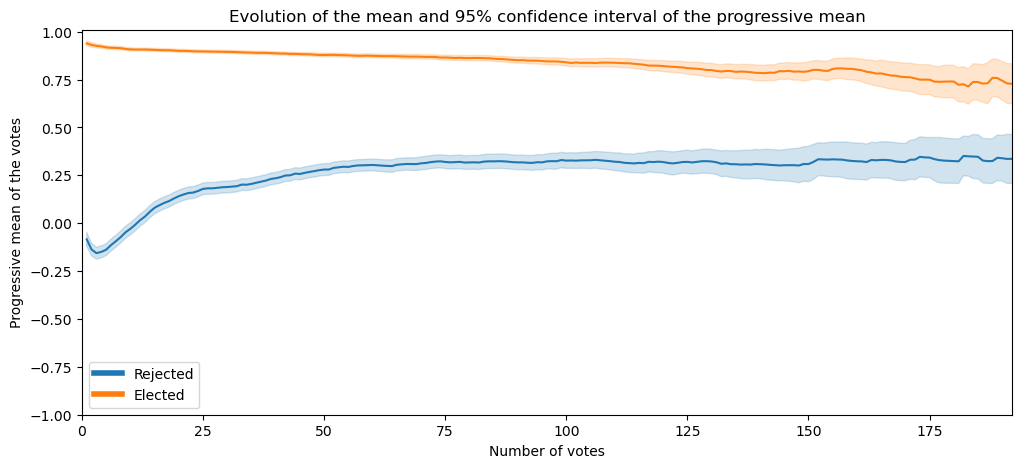

In [9]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles, 'Vote_number')
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem, 'Vote_number')
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()

In [15]:
df_vote_evolution.sort_values(by=['Target', 'Round', 'Voting_time'], inplace=False).iloc[60:120]

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number,progressive_mean
27294,HJ Mitchell,1234r00t,-1,-1.0,2010.0,2010-05-20 00:20:00,'''Maybe later'''. You're obviously off to a g...,1,0 days 00:13:59.999999998,4,-1.000000
27295,Rodhullandemu,1234r00t,-1,-1.0,2010.0,2010-05-20 00:30:00,"Sorry, you've nowhere near enough experience t...",1,0 days 00:24:00,5,-1.000000
27296,LiberalFascist,1234r00t,-1,-1.0,2010.0,2010-05-20 00:57:00,"Unfortunately, since we have no way to see wha...",1,0 days 00:51:00,6,-1.000000
71189,Glacier Wolf,21655,1,-1.0,2008.0,2008-03-17 22:08:00,'''Support''' as nominator. Good luck! '''<fon...,1,0 days 00:00:00,1,1.000000
71190,Clpo13,21655,1,-1.0,2008.0,2008-03-17 22:38:00,'''Support''' - 21655 looks like he'd make a g...,1,0 days 00:30:00,2,1.000000
71191,EJF,21655,1,-1.0,2008.0,2008-03-17 22:44:00,"'''Support''' — Yes, blows [[User:EJF/Adminshi...",1,0 days 00:36:00,3,1.000000
71193,Keeper76,21655,-1,-1.0,2008.0,2008-03-17 22:53:00,"'''Oppose'''. Sorry to be the first one here, ...",1,0 days 00:45:00,4,0.500000
71194,Deacon of Pndapetzim,21655,-1,-1.0,2008.0,2008-03-17 23:06:00,'''Oppose'''. Poor mainspace coverage as well ...,1,0 days 00:58:00.000000001,5,0.200000
71195,Tiptoety,21655,-1,-1.0,2008.0,2008-03-17 23:07:00,'''Oppose''' - Per the diff's provided by Kepp...,1,0 days 00:58:59.999999998,6,0.000000
71192,Spencer,21655,1,-1.0,2008.0,2008-03-17 23:10:00,'''Support''' Great interactions with this use...,1,0 days 01:01:59.999999998,7,0.142857


#### Scatter plots and density

In [22]:
# Scatter plot of the progressive mean by voting time and vote number
def plot_time_distribution(df, x):
    data = df.copy()
    data.Voting_time = time_to_float(data.Voting_time)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.displot(data, x=x, y='progressive_mean', hue='Results', cbar=True, palette='tab10', ax=ax)
    ax.set_xlim(0, 8*24)
    ax.set_ylim(-1.01, 1.01)
    ax.set_ylabel('Progressive mean')
    if x == 'Voting_time': 
        ax.set_xlabel('Voting time')
        ax.set_title('Scatter plot of the progressive mean by voting time')
    elif x == 'Vote_number': 
        ax.set_xlabel('Number of votes casted before')
        ax.set_title('Scatter plot of the progressive mean by vote number')
    plt.show()

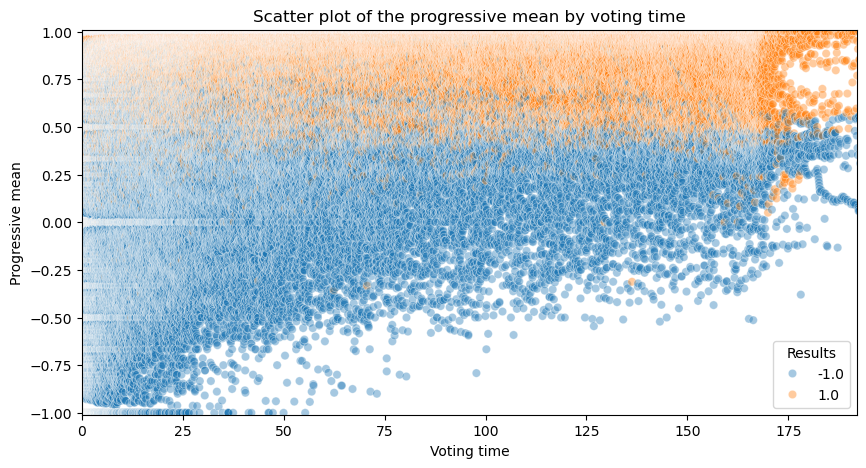

In [23]:
plot_scatter(df_vote_evolution, 'Voting_time')

# Prediction of the results based on early votes

# Knowledge tracing models to predict the outcome of the election

In [ ]:
import 

SyntaxError: invalid syntax (2494350585.py, line 1)